# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 462


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = url + "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Country": city_country,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | agbor
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | basoko
Processing Record 4 of Set 1 | deputatskiy
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | tuy hoa
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | klungkung
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | chongwe
Processing Record 18 of Set 1 | karaul
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | davila


Processing Record 35 of Set 4 | kapoeta
Processing Record 36 of Set 4 | khormuj
City not found. Skipping...
Processing Record 37 of Set 4 | lima
Processing Record 38 of Set 4 | biltine
Processing Record 39 of Set 4 | grajau
Processing Record 40 of Set 4 | ixtapa
Processing Record 41 of Set 4 | quatre cocos
Processing Record 42 of Set 4 | hualmay
Processing Record 43 of Set 4 | palmer
Processing Record 44 of Set 4 | camopi
Processing Record 45 of Set 4 | dikson
Processing Record 46 of Set 4 | olden
Processing Record 47 of Set 4 | torrington
Processing Record 48 of Set 4 | kamenka
Processing Record 49 of Set 4 | yinchuan
Processing Record 0 of Set 5 | ewa beach
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | vostok
Processing Record 4 of Set 5 | kabare
Processing Record 5 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | umm kaddadah
Processing Record 8 o

Processing Record 22 of Set 8 | cervo
Processing Record 23 of Set 8 | aktau
Processing Record 24 of Set 8 | banjar
Processing Record 25 of Set 8 | gizo
Processing Record 26 of Set 8 | magdug
Processing Record 27 of Set 8 | zyryanka
Processing Record 28 of Set 8 | blankenburg
Processing Record 29 of Set 8 | beira
Processing Record 30 of Set 8 | shenjiamen
Processing Record 31 of Set 8 | barra
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | saint-augustin
Processing Record 34 of Set 8 | almaznyy
Processing Record 35 of Set 8 | rawdon
Processing Record 36 of Set 8 | wailuku
Processing Record 37 of Set 8 | klaksvik
Processing Record 38 of Set 8 | talnakh
Processing Record 39 of Set 8 | anastacio
Processing Record 40 of Set 8 | faya
Processing Record 41 of Set 8 | cangzhou
Processing Record 42 of Set 8 | amurzet
Processing Record 43 of Set 8 | kodino
Processing Record 44 of Set 8 | maniitsoq
Processing Record 45 of Set 8 | san carlos del zulia
Processing Record 46 of 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


In [10]:
# Show Record Count
city_data_df.count()


City          418
Country       418
Lat           418
Lng           418
Max Temp      418
Humidity      418
Cloudiness    418
Wind Speed    418
Date          418
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,agbor,NG,6.2518,6.1934,77.68,90,42,5.17,1681335369
1,mataura,NZ,-46.1927,168.8643,52.48,92,100,6.98,1681335370
2,basoko,CD,1.2391,23.6160,72.86,79,100,2.98,1681335370
3,deputatskiy,RU,69.3000,139.9000,-6.11,92,11,2.66,1681335371
4,vila franca do campo,PT,37.7167,-25.4333,59.41,82,99,3.87,1681335371


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,agbor,NG,6.2518,6.1934,77.68,90,42,5.17,1681335369
1,1,mataura,NZ,-46.1927,168.8643,52.48,92,100,6.98,1681335370
2,2,basoko,CD,1.2391,23.6160,72.86,79,100,2.98,1681335370
3,3,deputatskiy,RU,69.3000,139.9000,-6.11,92,11,2.66,1681335371
4,4,vila franca do campo,PT,37.7167,-25.4333,59.41,82,99,3.87,1681335371


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

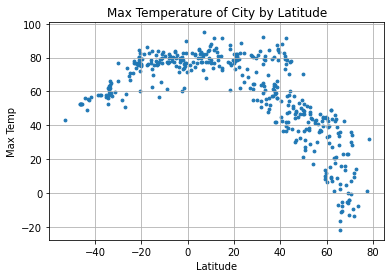

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = "o", s=8)

# Incorporate the other graph properties
plt.title("Max Temperature of City by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

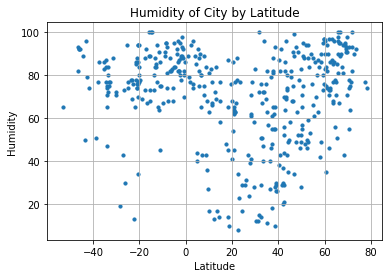

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = "o", s=10)

# Incorporate the other graph properties
plt.title("Humidity of City by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

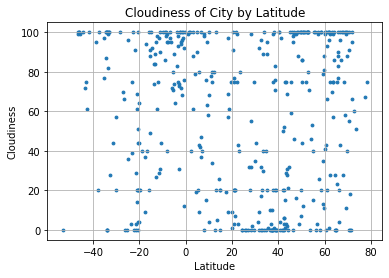

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = "o", s=8)

# Incorporate the other graph properties
plt.title("Cloudiness of City by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

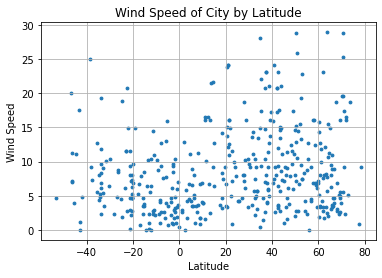

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = "o", s=8)

# Incorporate the other graph properties
plt.title("Wind Speed of City by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


You should create the following plots:

Northern Hemisphere: Temperature vs. Latitude

Southern Hemisphere: Temperature vs. Latitude

Northern Hemisphere: Humidity vs. Latitude

Southern Hemisphere: Humidity vs. Latitude

Northern Hemisphere: Cloudiness vs. Latitude

Southern Hemisphere: Cloudiness vs. Latitude

Northern Hemisphere: Wind Speed vs. Latitude

Southern Hemisphere: Wind Speed vs. Latitude

In [75]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, text_coordinates):
                      
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
                      
    regress = x_values * slope + intercept
                      
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                      
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress, "r")
    plt.annotate(line, text_coordinates, fontsize=12, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value}")
    plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,agbor,NG,6.2518,6.1934,77.68,90,42,5.17,1681335369
2,2,basoko,CD,1.2391,23.6160,72.86,79,100,2.98,1681335370
3,3,deputatskiy,RU,69.3000,139.9000,-6.11,92,11,2.66,1681335371
4,4,vila franca do campo,PT,37.7167,-25.4333,59.41,82,99,3.87,1681335371
5,5,kapaa,US,22.0752,-159.3190,79.12,78,75,14.97,1681335371


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,1,mataura,NZ,-46.1927,168.8643,52.48,92,100,6.98,1681335370
6,6,cape town,ZA,-33.9258,18.4232,61.09,74,0,2.30,1681335300
9,9,new norfolk,AU,-42.7826,147.0587,54.91,79,61,1.12,1681335373
11,11,castro,BR,-24.7911,-50.0119,66.52,74,96,1.90,1681335374
12,12,rikitea,PF,-23.1203,-134.9692,77.83,69,39,11.61,1681335374


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8414052500818396


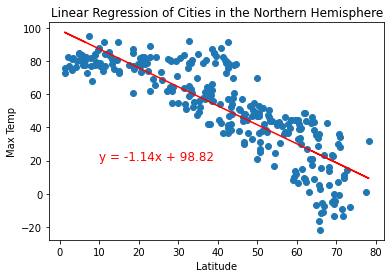

In [78]:
# Linear regression on Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Northern Hemisphere', 'Max Temp', (10, 20))

The r-value is: 0.7583131116276105


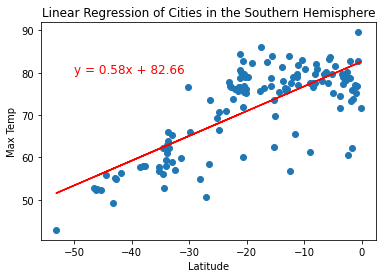

In [80]:
# Linear regression on Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Southern Hemisphere', 'Max Temp', (-50, 80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3045855847750265


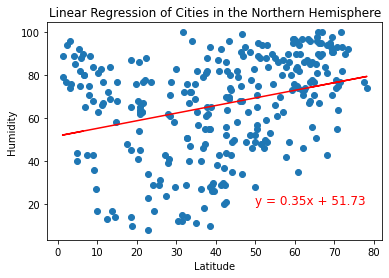

In [82]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Northern Hemisphere', 'Humidity', (50, 20))

The r-value is: 0.7583131116276105


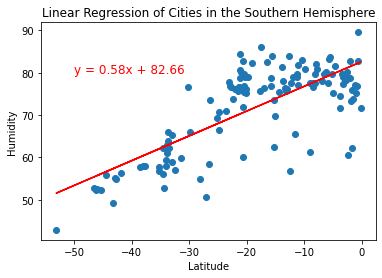

In [83]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Southern Hemisphere', 'Humidity', (-50, 80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13945107577412225


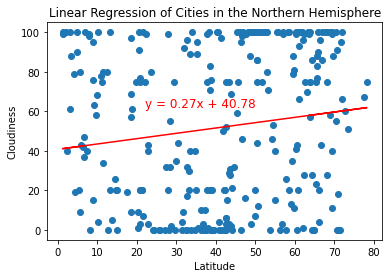

In [96]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Northern Hemisphere', 'Cloudiness', (22, 62))

The r-value is: 0.12990231879189745


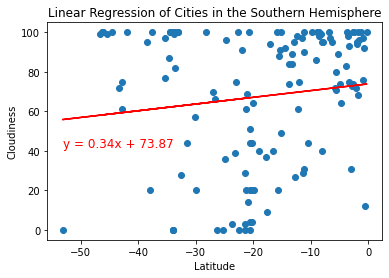

In [95]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Southern Hemisphere', 'Cloudiness', (-53, 42))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07665720396426845


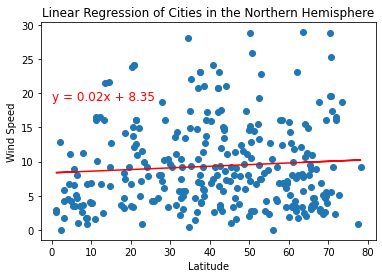

In [102]:
# Northern Hemisphere
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Northern Hemisphere', 'Wind Speed', (0, 19))


The r-value is: -0.29514453765032816


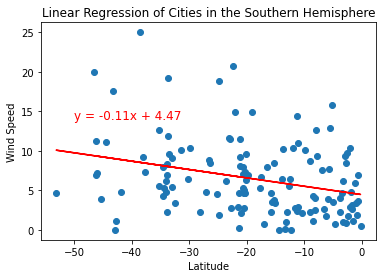

In [106]:
# Southern Hemisphere
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

linear_regression( x_values, y_values, 
            'Linear Regression of Cities in the Southern Hemisphere', 'Wind Speed', (-50, 14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE